<a href="https://colab.research.google.com/github/sayevvv/machineLearning/blob/main/ML_JS06_Regresi_Abdullah_Shamil_Basayev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#JS06 - REGRESI

#Abdullah Shamil Basayev
TI/3B - 2341720166



Langkah 1: Persiapan Data
Langkah 2: Import Library
Langkah 3: Baca Data

In [1]:
# import package
import numpy as np
import pandas as pd
data = pd.read_csv('/content/dataset.csv')
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


Langkah 4: Pemahaman Terhadap Data

In [2]:
# melihat beberapa data awal
data.head()

# mengecek ukuran data
data.shape

# informasi tentang data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


Langkah 5: Visualisasi Data

In [3]:
# import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

Gunakan pairplot untuk menampilkan hubungan antara variabel bebas dan variabel target dalam bentuk scatter plot.

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


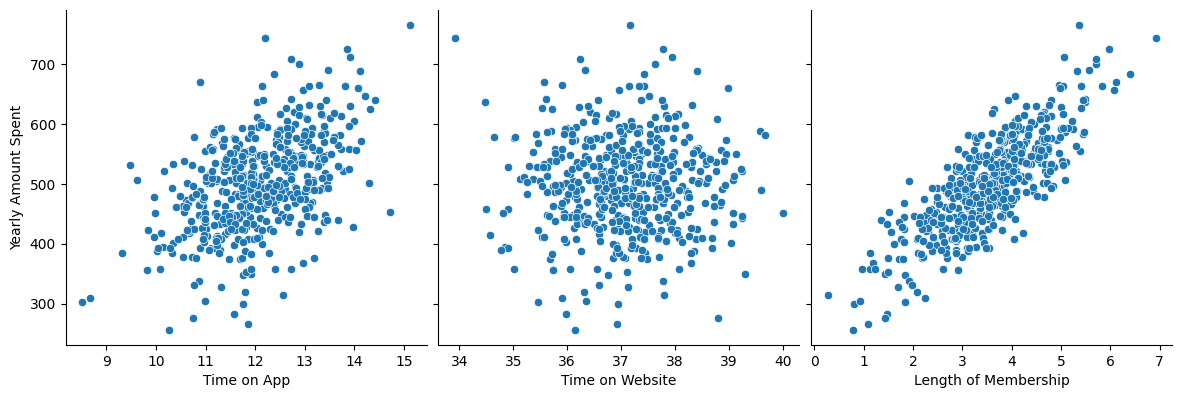

In [4]:
# visualisasi data dengan pairplot
sns.pairplot(data, x_vars=['Time on App', 'Time on Website', 'Length of Membership'],
             y_vars='Yearly Amount Spent', size=4, aspect=1, kind='scatter')
plt.show()

Gunakan heatmap untuk menampilkan matriks korelasi antara variabel-variabel dalam dataset. Semakin tinggi nilainya, semakin tinggi korelasinya.

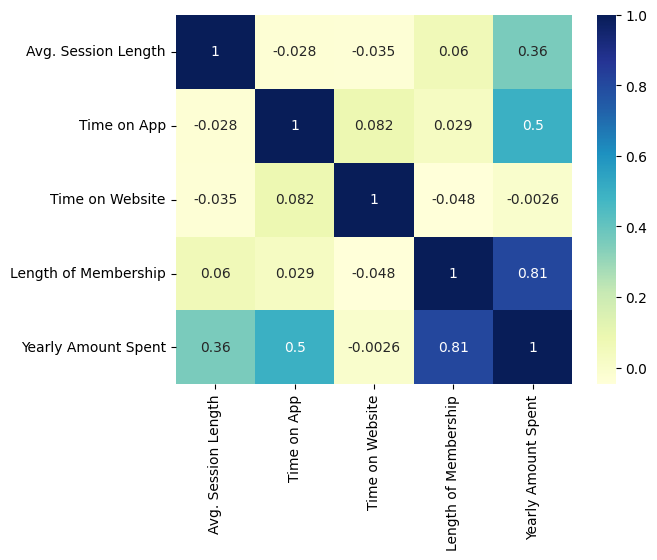

In [6]:
# visualisasi korelasi dengan heatmap
# Exclude non-numeric columns before calculating correlation
sns.heatmap(data.drop(['Email', 'Address', 'Avatar'], axis=1).corr(), cmap="YlGnBu", annot=True)
plt.show()

Langkah 6: Regresi Linier

Pisahkan variabel bebas (X) dan variabel target (y).

In [7]:
# Membuat variabel bebas X dan Y, contoh pengambilan dari analisis korelasi sebelumnya
X = data['Length of Membership']
y = data['Yearly Amount Spent']

Bagi data menjadi data latih (70%) dan data uji (30%) menggunakan train_test_split.

Lakukan training model regresi linier menggunakan library StatsModels. Tambahkan konstanta (intercept) ke variabel bebas.

In [8]:
# Pembagian data latih dan data uji dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [9]:
# Training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()


Visualisasikan garis regresi pada data latih.

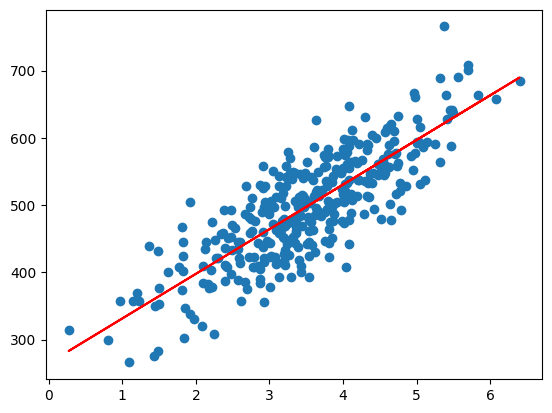

In [10]:
# Visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

Langkah 7: Analisis Residual

Lakukan prediksi nilai y dari data latih dan hitung residual (selisih antara nilai sebenarnya dan nilai prediksi).

In [11]:
# Prediksi nilai y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

# Menghitung residual
res = (y_train - y_train_pred)


Visualisasikan residual dalam bentuk histogram dan scatter plot untuk mengevaluasi distribusi dan pola error.

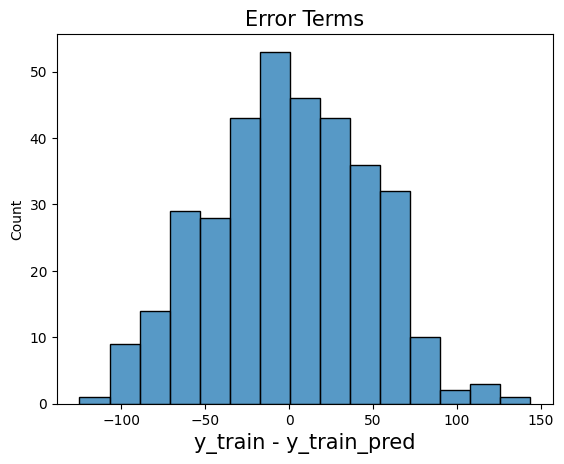

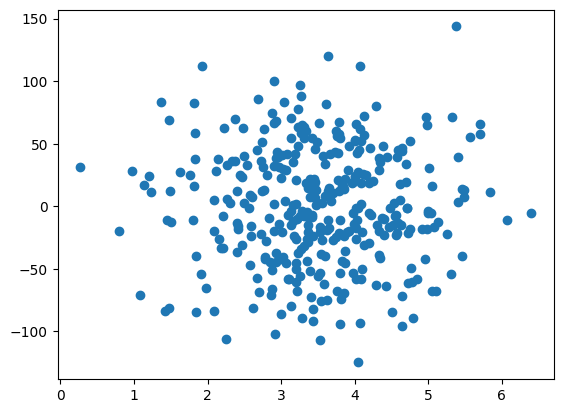

In [13]:
# Histogram residual
fig = plt.figure()
sns.distplot(res, bins=15)
plt.title('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

# Scatter plot residual
plt.scatter(X_train, res)
plt.show()

Langkah 8: Prediksi pada Data Uji dan Evaluasi Model

Lakukan prediksi pada data uji.

In [14]:
# Prediksi pada data uji
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)

Hitung nilai R-squared untuk mengukur kinerja model pada data uji.


In [15]:
# Hitung nilai R-squared
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)

Langkah 9: Visualisasi Hasil

Visualisasikan data uji dan hasil prediksi dalam bentuk scatter plot.

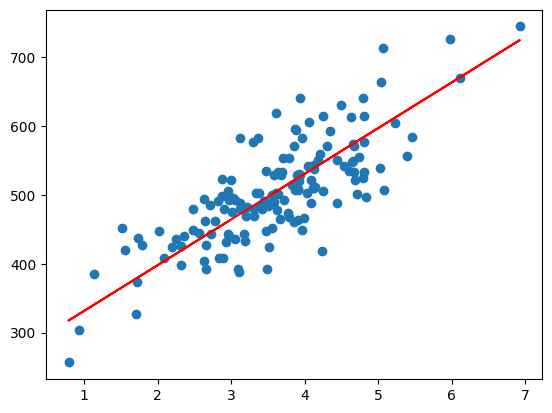

In [16]:
# Visualisasi data uji dan hasil prediksi
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

#PRAKTIKUM 2


Mengimpor Library:

Lakukan import library yang diperlukan terlebih dahulu, termasuk NumPy, Matplotlib, dan pandas.

In [18]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


Mengimpor Dataset:

Pastikan sudah mendownload file CSV 'Posisi_gaji.csv' dan letakkan dalam direktori yang sama. Ini adalah dataset yang akan digunakan dalam praktikum ini.

Membaca dataset menggunakan pd.read_csv dan memilih fitur (variabel independen X) dan target (variabel dependen y).

In [19]:
# Mengimpor dataset (Pastikan Anda memiliki file CSV 'Posisi_gaji.csv' dalam direktori yang sama)
dataset = pd.read_csv('/content/Posisi_gaji.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values  # Ubah menjadi satu kolom saja


Feature Scaling:

Menggunakan StandardScaler untuk melakukan penskalaan fitur X dan target y. Ini diperlukan karena SVM sangat sensitif terhadap skala data.

In [20]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

Fitting SVR ke Dataset:

Lakukan pembuatan model SVR dengan kernel RBF (Radial Basis Function) dan melatihnya dengan data yang telah di-scaled.

In [21]:
# Fitting SVR ke dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

Visualisasi Hasil SVR:

langkah selanjutkan, lakukan visualisasi Menggunakan grafik untuk memvisualisasikan hasil prediksi model SVR. Ini mencakup plotting data asli (titik-titik merah) dan kurva hasil prediksi (garis biru) untuk tingkat posisi yang bervariasi.

/tmp/ipython-input-1841224750.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)


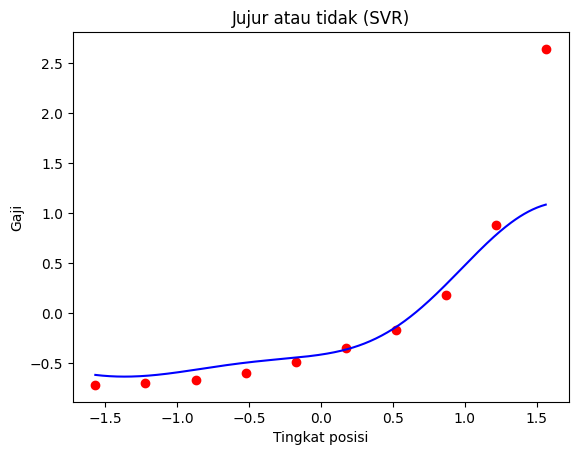

In [22]:
# Visualisasi hasil SVR (resolusi tinggi dan kurva yang lebih halus)
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Jujur atau tidak (SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()

Prediksi Hasil:

Membuat array 2D yang berisi tingkat posisi yang akan diprediksi. Dalam contoh ini, tingkat posisi 6.5.

Menskalakan fitur prediksi menggunakan sc_X.transform.

Melakukan prediksi menggunakan model SVR yang telah dilatih.

Mengembalikan hasil prediksi ke dalam skala aslinya menggunakan sc_y.inverse_transform.

In [23]:
# Prediksi hasil
# Buat array 2D yang berisi tingkat posisi yang akan diprediksi
tingkat_posisi_prediksi = np.array([[6.5]])
# Penskalaan fitur untuk data yang akan diprediksi
tingkat_posisi_prediksi = sc_X.transform(tingkat_posisi_prediksi)
# Melakukan prediksi menggunakan model SVR
gaji_prediksi = regressor.predict(tingkat_posisi_prediksi)
# Kembalikan hasil prediksi ke skala aslinya
gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1, 1))

Menampilkan Hasil:

Menampilkan hasil prediksi gaji untuk tingkat posisi 6.5 dalam kode

In [26]:
# Menampilkan hasil prediksi
print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gaji_prediksi[0])

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]


Evaluasi Model SVR

Langkah terakhir adalah melakukan evaluasi model meliputi MAE, MSE dan R-squared

In [27]:
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_actual = y
y_pred = regressor.predict(X)

# Menghitung MAE
mae = mean_absolute_error(y_actual, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_actual, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 0.22299274095734414
MSE: 0.24839989293792014
RMSE: 0.4983973243687411
R-squared: 0.7516001070620798


Tugas Praktikum

Setup & Load Dataset

In [32]:
# === Cell 1: Load and inspect dataset ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/insurance.csv")  # ganti path sesuai lokasi upload di Colab

# Basic info
print("Shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values per column:\n", df.isna().sum())
print("\nDescriptive statistics:\n", df.describe())

# Preview first rows
df.head(10)


Shape: (1338, 7)

Data types:
 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Missing values per column:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Descriptive statistics:
                age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


Deskripsi Variabel & Visualisasi Awal

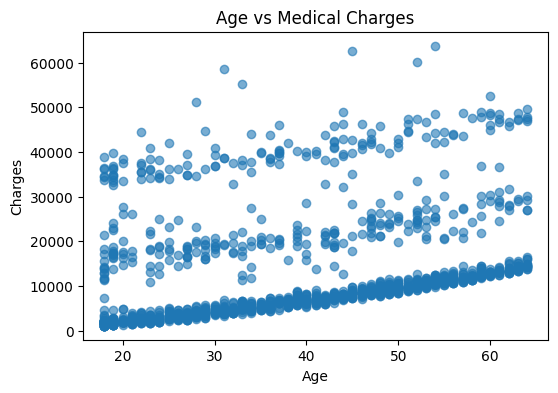

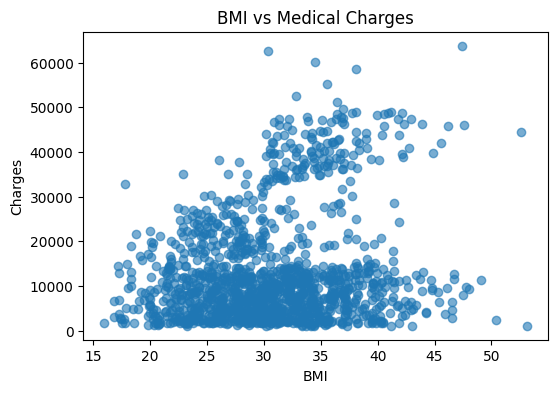

/tmp/ipython-input-2298522099.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df["smoker"]=="no"]["charges"], df[df["smoker"]=="yes"]["charges"]],


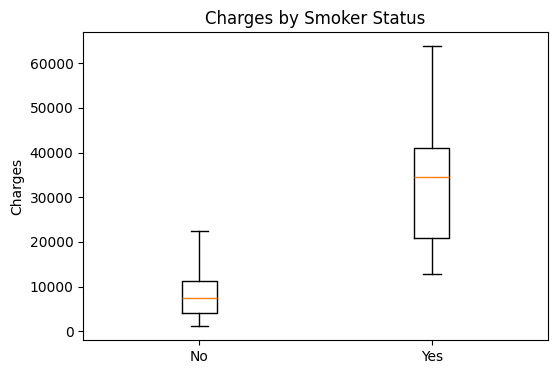

In [33]:
# === Cell 2: Exploratory Visualizations ===
plt.figure(figsize=(6,4))
plt.scatter(df["age"], df["charges"], alpha=0.6)
plt.title("Age vs Medical Charges")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(df["bmi"], df["charges"], alpha=0.6)
plt.title("BMI vs Medical Charges")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

plt.figure(figsize=(6,4))
plt.boxplot([df[df["smoker"]=="no"]["charges"], df[df["smoker"]=="yes"]["charges"]],
            labels=["No", "Yes"], showfliers=False)
plt.title("Charges by Smoker Status")
plt.ylabel("Charges")
plt.show()


Preprocessing & Split Dataset

In [34]:
# === Cell 3: Data Split & Preprocessing ===
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Fitur dan target
X = df.drop(columns=["charges"])
y = df["charges"]

# Pisahkan tipe data
numeric_features = ["age", "bmi", "children"]
categorical_features = ["sex", "smoker", "region"]

# OneHot Encoding untuk kategori
preprocess = ColumnTransformer([
    ("cat", OneHotEncoder(drop="first"), categorical_features),
    ("num", "passthrough", numeric_features)
])

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape :", X_test.shape)


Train shape: (1070, 6)
Test shape : (268, 6)


Model Multiple Linear Regression

In [35]:
# === Cell 4: Train and Evaluate Linear Regression ===
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Transform data
X_train_prep = preprocess.fit_transform(X_train)
X_test_prep = preprocess.transform(X_test)

# Model
linreg = LinearRegression()
linreg.fit(X_train_prep, y_train)

# Prediksi
y_pred = linreg.predict(X_test_prep)

# Evaluasi
r2 = metrics.r2_score(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)

print("=== Evaluation Metrics ===")
print(f"R²  : {r2:.4f}")
print(f"MSE : {mse:.2f}")
print(f"MAE : {mae:.2f}")

# Koefisien
encoded_names = preprocess.named_transformers_["cat"].get_feature_names_out(categorical_features)
feature_names = list(encoded_names) + numeric_features

coef_table = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": linreg.coef_
}).sort_values("Coefficient", ascending=False)

coef_table


=== Evaluation Metrics ===
R²  : 0.7836
MSE : 33596915.85
MAE : 4181.19


,Feature,Coefficient
1,smoker_yes,23651.128856
7,children,425.278784
6,bmi,337.092552
5,age,256.975706
0,sex_male,-18.591692
2,region_northwest,-370.677326
3,region_southeast,-657.864297
4,region_southwest,-809.799354


Visualisasi Evaluasi

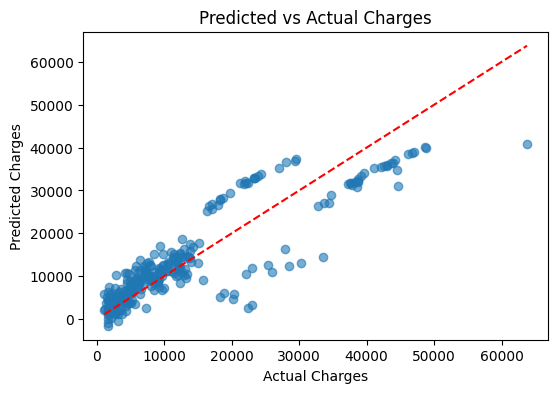

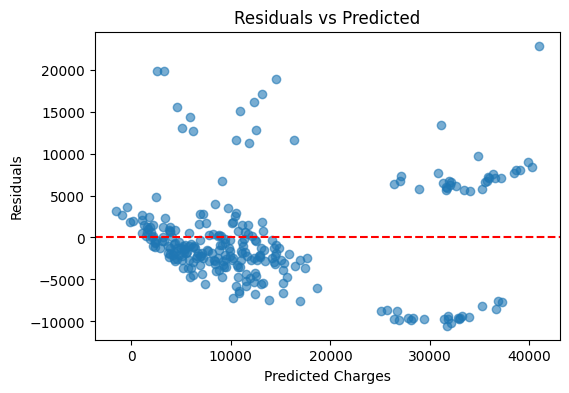

In [36]:
# === Cell 5: Diagnostic Plots ===
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.title("Predicted vs Actual Charges")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.show()

# Residuals
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals")
plt.show()


Analisis Hasil Multiple Linear Regression
1. Interpretasi Model

Model Multiple Linear Regression digunakan untuk memprediksi biaya medis (charges) berdasarkan usia, BMI, jumlah anak, jenis kelamin, status perokok, dan wilayah tempat tinggal.
Nilai R² sebesar 0.7836 menunjukkan bahwa model mampu menjelaskan sekitar 78,36% variasi biaya medis pada data uji. Ini menandakan model memiliki performa yang cukup baik untuk kasus regresi linear.

2. Evaluasi Performa
Metrik	Nilai	Interpretasi
R²	0.7836	Model menjelaskan 78% variasi biaya medis.
MSE	33.6 juta	Nilai error kuadrat rata-rata, cukup besar karena satuan biaya dalam dolar.
MAE	4181.19	Rata-rata kesalahan prediksi sebesar ±4181 USD per individu.

Model memiliki akurasi yang cukup baik, tetapi masih terdapat error pada individu dengan biaya medis sangat tinggi.

3. Interpretasi Koefisien
Fitur	Koefisien	Interpretasi
smoker_yes	+23651.13	Faktor paling berpengaruh; perokok membayar rata-rata 23.651 USD lebih tinggi.
children	+425.28	Setiap anak menambah biaya medis sekitar 425 USD.
bmi	+337.09	Kenaikan 1 unit BMI menambah biaya medis sekitar 337 USD.
age	+256.97	Setiap kenaikan 1 tahun usia menambah biaya sekitar 257 USD.
sex_male	-18.59	Pengaruh sangat kecil, hampir tidak signifikan.
region_northwest / southeast / southwest	negatif kecil	Biaya sedikit lebih rendah dibanding wilayah timur laut (baseline).

Kesimpulan: variabel paling dominan yang memengaruhi biaya medis adalah status perokok, diikuti oleh usia dan BMI.

4. Analisis Grafik

Predicted vs Actual Charges

Titik-titik data cenderung mengikuti garis diagonal, menandakan prediksi cukup dekat dengan nilai aktual.

Namun, pada biaya tinggi (>40.000 USD), model cenderung underestimate (memperkirakan terlalu rendah), menunjukkan keterbatasan model linear untuk menangani data ekstrem.

Residuals vs Predicted

Sebagian besar residual tersebar acak di sekitar nol, menandakan model cukup baik.

Pola melengkung di area prediksi tinggi menunjukkan adanya indikasi non-linearitas pada hubungan antara fitur dan target.

5. Kesimpulan Akhir

Model Multiple Linear Regression memiliki performa yang baik (R² ≈ 0.78) dan memberikan interpretasi yang jelas mengenai faktor-faktor yang memengaruhi biaya medis.
Namun, model ini cenderung kurang akurat untuk kasus dengan biaya medis sangat tinggi. Pendekatan non-linear seperti Support Vector Regression (SVR) atau Random Forest Regression dapat digunakan untuk meningkatkan performa pada data dengan pola yang lebih kompleks.